In [93]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## import library

In [260]:
import pandas as pd
import numpy as np
import stpredict


In [261]:
data = pd.read_excel("C:/Users/sh/Desktop/term 3 ut/Thesis and Paper/R/New folder/stpredict_data.xlsx")
data.head()

,spatial id level 1,spatial id level 2,temporal id level 1,temporal id level 2,temporal covariate 1,temporal covariate 2,temporal covariate 3,temporal covariate 4,target
0,County FIPS code,State FIPS code,week,year,Q_in,Temp_in,pH_in,COD_in,Q_eff
1,1001,1,1,2015,355992,22,7.25,690,332402
2,1001,1,2,2015,398254,23,7.2,587,372540
3,1001,1,3,2015,421601,24,7.23,618,392705
4,1001,1,4,2015,399821,23,7.26,582,373491


In [262]:
from stpredict.preprocess import preprocess_data

data.columns = list(data.iloc[0,:])
data2 = data.iloc[2:,:]

historical_data = preprocess_data(data2, forecast_horizon = 1, history_length = 1, 
                                  column_identifier = {'spatial id level 1'  : 'County\xa0FIPS code',
                                                       'spatial id level 2'  : 'State\xa0FIPS code',
                                                       'temporal id level 1' : 'week',
                                                       'temporal id level 2' : 'year',
                                                       'temporal covariates' : ['Q_in','Temp_in','pH_in','COD_in'],
                                                       'target'              : 'Q_eff'}, 
                                  spatial_scale_table = None,
                                  spatial_scale_level = 1, temporal_scale_level = 1, 
                                  target_mode = 'normal', imputation = True, 
                                  aggregation_mode = 'mean', augmentation = False, 
                                  futuristic_covariates = None, future_data_table = None, 
                                  save_address = None, verbose = 0)
historical_data
data2
data.columns

,spatial id,temporal id,Target (normal),Normal target,Q_in t,Temp_in t,pH_in t,COD_in t
0,1001,2015/10,389764.0,389764.0,464867.0,24.0,7.25,507.0
1,1001,2015/11,391312.0,391312.0,413475.0,23.0,7.30,480.0
2,1001,2015/12,402455.0,402455.0,402260.0,23.0,7.28,551.0
3,1001,2015/13,406135.0,406135.0,409670.0,24.0,7.24,518.0
4,1001,2015/14,409009.0,409009.0,413625.0,23.0,7.34,513.0
...,...,...,...,...,...,...,...,...
80,1001,2016/5,417768.0,417768.0,427056.0,23.0,7.36,426.0
81,1001,2016/6,414096.0,414096.0,431712.0,22.0,8.06,389.0
82,1001,2016/7,417192.0,417192.0,424440.0,22.0,7.36,467.0
83,1001,2016/8,414264.0,414264.0,427872.0,22.0,7.36,297.0


,County FIPS code,State FIPS code,week,year,Q_in,Temp_in,pH_in,COD_in,Q_eff
2,1001,1,2,2015,398254,23,7.2,587,372540
3,1001,1,3,2015,421601,24,7.23,618,392705
4,1001,1,4,2015,399821,23,7.26,582,373491
5,1001,1,5,2015,425366,24,7.27,652,393104
6,1001,1,6,2015,429085,23,7.37,544,400274
...,...,...,...,...,...,...,...,...,...
82,1001,1,30,2016,392832,22,7.26,459,381192
83,1001,1,31,2016,409224,23,7.12,511,397512
84,1001,1,32,2016,436152,24,7.22,444,425856
85,1001,1,33,2016,431256,24,7.27,417,406536


Index(['County FIPS code', 'State FIPS code', 'week', 'year', 'Q_in',
       'Temp_in', 'pH_in', 'COD_in', 'Q_eff'],
      dtype='object')

AttributeError: 'DataFrame' object has no attribute 'tolist'

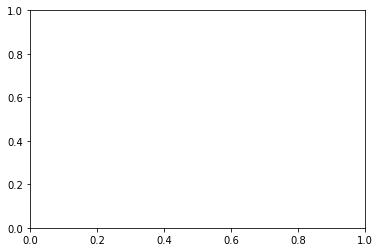

In [265]:
from stpredict.preprocess import plot_data

data.columns = list(data.iloc[0,:])
data3 = data.iloc[1:,:]

plot_data(data3, spatial_scale_table = None,
          column_identifier = {'spatial id level 1' :'County\xa0FIPS code',
                               'spatial id level 2' :'State\xa0FIPS code',
                               'temporal id level 1':'week',
                               'temporal id level 2':'year',
                               'temporal covariates':['Q_in','Temp_in','pH_in','COD_in'],
                               'target'             :'Q_eff'}, 
          temporal_covariate = ['Q_in'])

In [201]:
data.columns = list(data.iloc[0,:])
data3 = data.iloc[1:,:]
# email
predict.predict(list(data3), forecast_horizon = 1,  feature_sets = {'covariate':'mRMR'}, 
                forced_covariates = [], models = ['glm'],  mixed_models = ['glm'], 
                model_type = 'regression', test_type = 'whole-as-one',
                splitting_type = 'training-validation',  instance_testing_size = 0.2, 
                instance_validation_size = 0.3, instance_random_partitioning = False, 
                fold_total_number = 5, feature_scaler = None, target_scaler = None, 
                performance_benchmark = 'MAPE',  performance_measures = ['MAPE'], 
                performance_mode = 'normal', scenario = 'current', 
                validation_performance_report = True, testing_performance_report = True, 
                save_predictions = True, save_ranked_features = True,
                plot_predictions = False, verbose = 0)

Exception: [Errno 2] No such file or directory: 'County\xa0FIPS code'

In [ ]:
predict.predict(list(data3), forecast_horizon = 1,  feature_sets = {'covariate':'mRMR'}, 
                forced_covariates = [], models = ['glm'],  mixed_models = ['glm'], 
                model_type = 'regression', test_type = 'whole-as-one',
                splitting_type = 'training-validation',  instance_testing_size = 0.2, 
                instance_validation_size = 0.3, instance_random_partitioning = False, 
                fold_total_number = 5, feature_scaler = None, target_scaler = None, 
                performance_benchmark = 'MAPE',  performance_measures = ['MAPE'], 
                performance_mode = 'normal', scenario = 'current', 
                validation_performance_report = True, testing_performance_report = True, 
                save_predictions = True, save_ranked_features = True,
                plot_predictions = False, verbose = 0)

In [267]:
data.columns = list(data.iloc[0,:])
data4 = data.iloc[1:,:]

from stpredict import stpredict

stpredict(data4, forecast_horizon = 1, history_length = 1, 
          column_identifier = {'spatial id level 1':'County\xa0FIPS code',
                               'spatial id level 2':'State\xa0FIPS code',
                               'temporal id level 1':'week',
                               'temporal id level 2':'year','temporal covariates':['Q_in','Temp_in','pH_in','COD_in'],'target':'Q_eff'},           feature_sets = {'covariate': 'mRMR'}, models = ['knn'], model_type = 'regression', 
          test_type = 'whole-as-one',mixed_models = ['glm'], performance_benchmark = 'MAPE', 
          performance_measures = ['MAPE'], performance_mode = 'normal', 
          splitting_type = 'training-validation', instance_testing_size = 0.2, 
          instance_validation_size = 0.3, instance_random_partitioning = False, 
          fold_total_number = 5, imputation = True, target_mode = 'normal', 
          feature_scaler = None, target_scaler = None, forced_covariates = [], 
          futuristic_covariates = None, scenario = 'current', future_data_table = None, 
          temporal_scale_level = 1, spatial_scale_level = 1, spatial_scale_table = None, 
          aggregation_mode = 'mean', augmentation = False, 
          validation_performance_report = True, testing_performance_report = True, 
          save_predictions = True, save_ranked_features = True, plot_predictions = False,
          verbose = 0)


Base models are running.



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.51it/s]



Mixed models are running.



100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 160.10it/s]



Base models are running.



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 52.74it/s]



Mixed models are running.



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.15it/s]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [ ]:
stpredict(historical_data, forecast_horizon = 2, history_length = 2,
                   models = ['knn'], model_type = 'regression')

In [ ]:
import pandas as pd
from stpredict.preprocess import make_historical_data

df1 = pd.read_csv('USA COVID-19 temporal data.csv')
df2 = pd.read_csv('USA COVID-19 spatial data.csv')


historical_data_frame = make_historical_data(data = {'temporal_data':df1,'spatial_data':df2},
                                             forecast_horizon = 4,
                                             history_length = {('temperature','precipitation'):2})

In [ ]:
from stpredict.predict import predict

predict(data = ['./historical_data h=1.csv', './historical_data h=2.csv',
                './historical_data h=3.csv'], forecast_horizon = 4)